# STEP Nº1: IMPORTING DATA

In [0]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Repo from Fashion dataset on --> https://github.com/zalandoresearch/fashion-mnist

# Import dataset.

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Import tensorflow's MNIST data handle
fashion_mnist = keras.datasets.fashion_mnist

# Load fashion dataset into the set for training & testing 
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()


In [0]:
# The original dataset comes with the shape [image_index, 28_, 28_]
# We flatten the data into the shape [image_index, 784 (28_ + 28_)]

#training_data = np.array([img_train.flatten() for img_train in train_data],)
training_data = np.array([data.flatten() for data in train_data], dtype='float32')
# Convert List to array and then Tranpose in order to have an Array of [img_index, 1]
training_label = np.array([train_label]).T

In [0]:
testing_data = np.array([data.flatten() for data in test_data],dtype='float32')
# Convert List to array and then Tranpose in order to have an Array of [img_index, 1]
testing_label = np.array([test_label]).T

# STEP Nº2 : VISUALIZING DATA 

In [108]:
#shape of trainning data
training_data.shape

(60000, 784)

In [109]:
#shape of trainning label
training_label.shape

(60000, 1)

In [110]:
#shape of testing data  
testing_data.shape

(10000, 784)

In [111]:
#shape of testing label
testing_label.shape

(10000, 1)

Label for this image is: 5


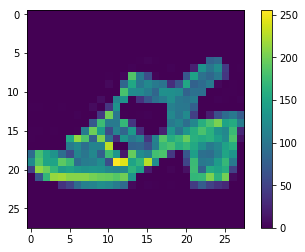

In [112]:
import random

# generate a randox img index for training_data
i = random.randint(1,60000)

#showing training data
print('Label for this image is: ' + str(training_label[i,0]))
plt.figure()
plt.imshow(training_data[i, 0:].reshape(28,28), cmap='viridis')
plt.colorbar()
plt.grid(False)
plt.show()


# This are the label classes:
# 0 => 'T-shirt/top'
# 1 => 'Trouser'
# 2 => 'Pullover'
# 3 => 'Dress'
# 4 => 'Coat'
# 5 => 'Sandal'
# 6 => 'Shirt'
# 7 => 'Sneaker'
# 8 =>  'Bag'
# 9 => 'Ankle boot'



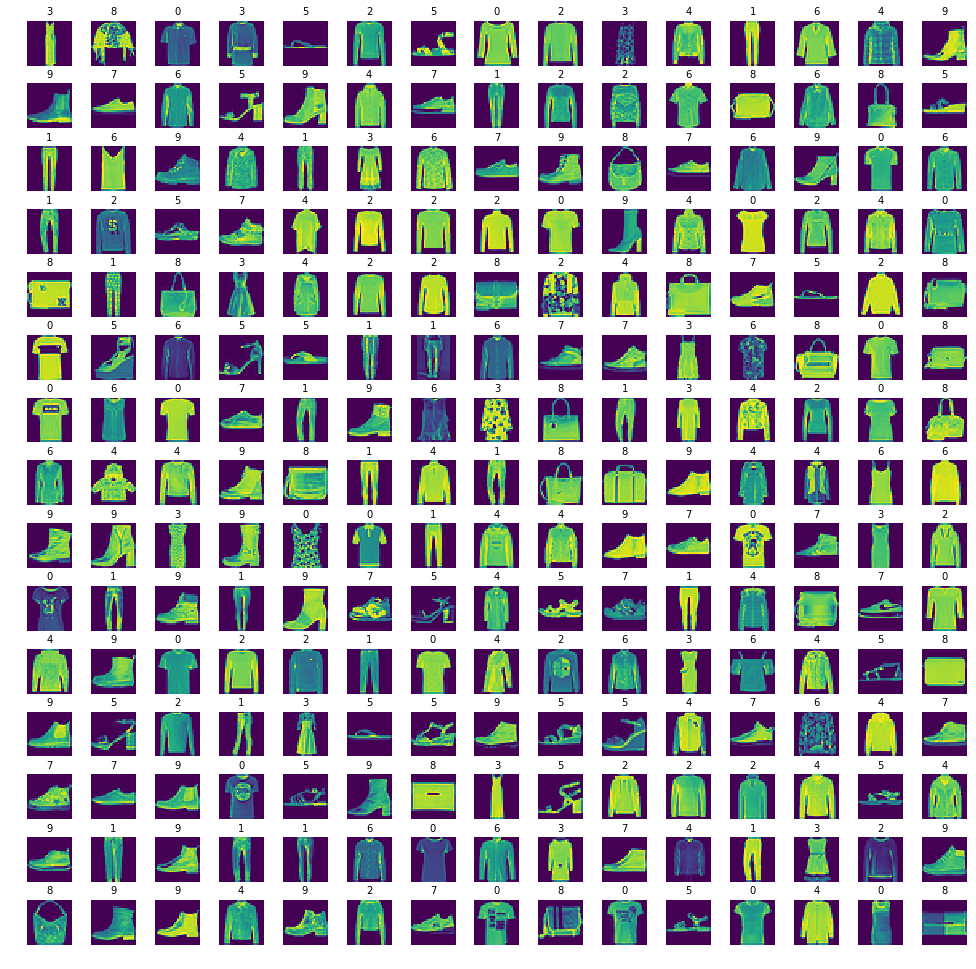

In [113]:
# lets visualize a set of images in order to have a better image of the problem
# define the demensions of the plot grid
W_grid = 15
L_grid = 15

# fig, size = plt.subplots(L_grid,w_grid)

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flatten the 15 x 15 matrix into 255 array

n_training = len(training_data)

for i in np.arange(0, W_grid * L_grid):
  
  # select random number
  index = random.randint(0, n_training)
  axes[i].imshow(training_data[index, 0:].reshape(28,28), cmap='viridis')
  axes[i].set_title(training_label[index,0], fontsize = 10)
  axes[i].axis('off')
  
plt.subplots_adjust(hspace=0.4)



#STEP Nº 3: TRAINING MODEL 

In [0]:
# normalize the training & testing data
X_train = training_data[:,:]/255
y_train = training_label[:, 0]

X_test = testing_data[:,:]/255
y_test = testing_label[:, 0]

In [0]:
# import train_test split selection
from sklearn.model_selection import train_test_split

In [0]:
# create train and validation dataset
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [0]:
# reshape dataset
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [118]:
# show shape
X_train.shape

(48000, 28, 28, 1)

In [119]:
X_test.shape

(10000, 28, 28, 1)

In [120]:
X_validate.shape

(12000, 28, 28, 1)

In [0]:
# import keras layers, optimizer & callbacks
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
# start forming the model. In our case we use an CNN & Dense model in order to solve the problem
cnn_model = Sequential()

In [123]:
# First Iteration --> Convolutional with 32 features / 3,3 kernel and Relu activation function
# cnn_model.add(Conv2D(32, 3, 3, input_shape = (28,28,1), activation="relu"))

# Second Iteration / Third Iteration --> Convulutional with 64 features / 3,3 kernel and Relu activation function
 cnn_model.add(Conv2D(64, 3, 3, input_shape = (28,28,1), activation="relu"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [0]:
# MaxPooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
# flat images to inputs
cnn_model.add(Flatten())

In [0]:
# First Iteration --> Dense of 32 outputs
# cnn_model.add(Dense(output_dim = 32, activation = "relu"))

# Second Iteration / Third Iteration --> Dense of 64 outputs
 cnn_model.add(Dense(units = 64, activation = "relu"))

In [0]:
# The Third Iteration use a Dropout layer to improve the model. Trying to avoid overfitting over the Dense layer
# Dropout 0.8 ratio
cnn_model.add(Dropout(rate=0.4))

In [128]:
# Dense of 10 outputs (fashion classes)
cnn_model.add(Dense(output_dim = 10, activation = "sigmoid"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [0]:
# compile model
cnn_model.compile(loss = 'sparse_categorical_crossentropy',optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [0]:
# define # of epochs
epochs = 50

In [131]:
# train the model
cnn_model.fit(X_train, 
              y_train, 
              batch_size= 512,
              nb_epoch = epochs,
              verbose=1, 
              validation_data= (X_validate, y_validate))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 35us/step - loss: 1.0671 - acc: 0.6436 - val_loss: 0.5104 - val_acc: 0.8268
Epoch 2/50
48000/48000 [==============================] - 1s 26us/step - loss: 0.6015 - acc: 0.8001 - val_loss: 0.3895 - val_acc: 0.8621
Epoch 3/50
48000/48000 [==============================] - 1s 25us/step - loss: 0.4823 - acc: 0.8348 - val_loss: 0.3437 - val_acc: 0.8762
Epoch 4/50
48000/48000 [==============================] - 1s 25us/step - loss: 0.4292 - acc: 0.8525 - val_loss: 0.3175 - val_acc: 0.8874
Epoch 5/50
48000/48000 [==============================] - 1s 25us/step - loss: 0.3853 - acc: 0.8679 - val_loss: 0.2925 - val_acc: 0.8950
Epoch 6/50
48000/48000 [==============================] - 1s 25us/step - loss: 0.3604 - acc: 0.8756 - val_loss: 0.2920 - val_acc: 0.8961
Epoch 7/50
48000/48000 [==============================] - 1s 25us/step - loss: 0.3382 - acc: 0.8811 - val_loss: 0.2650 - val_acc

# STEP N° 4: EVALUATING MODEL

In [132]:
# Evaluate the model
evaluation = cnn_model.evaluate(X_test,y_test)
# print the evaluation Accuaracy
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 53us/step
Test Accuracy : 0.917


In [133]:
# show the predicted classes (y_label_test) using as input the X_test set 
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([9, 2, 1, ..., 8, 1, 7])

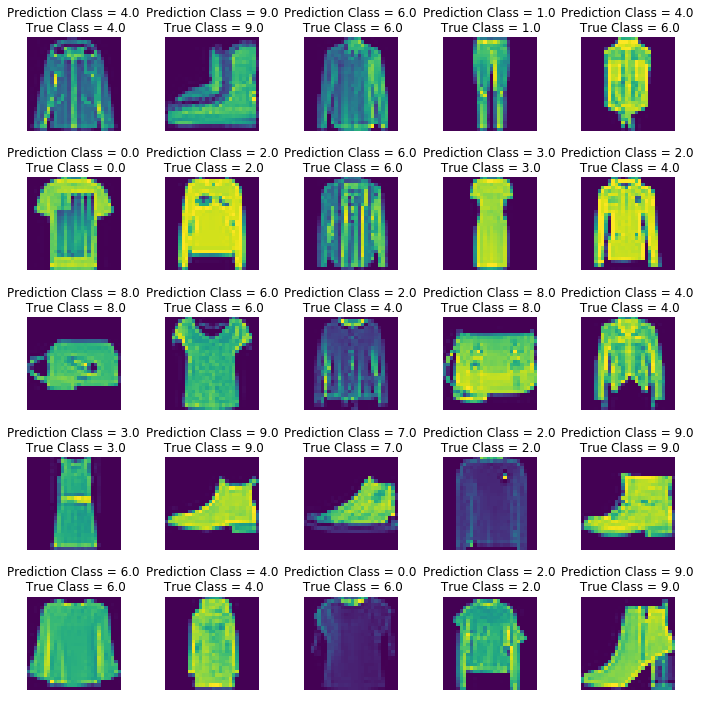

In [134]:
# visualize the results
W = 5
L = 5

# fig, size = plt.subplots(L_grid,w_grid)

fig, axes = plt.subplots(L, W, figsize = (12,12))

axes = axes.ravel() # flatten the 12 x 12 matrix into 255 array

n_testing = len(X_test)

for i in np.arange(0, W * L):
  
  # select random number
  index = random.randint(0, n_testing)
  axes[i].imshow(X_test[index].reshape(28,28), cmap='viridis')
  axes[i].set_title("Prediction Class = {:.1f}\n True Class = {:.1f}".format(predicted_classes[index],y_test[index]))
  axes[i].axis('off')
  
plt.subplots_adjust(hspace=0.5)



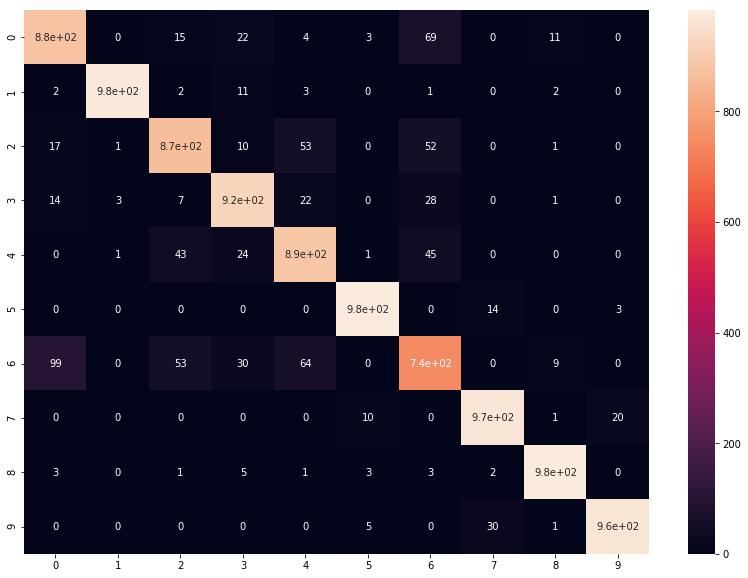

In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot= True)
# sum the diagonal element to get the the total true correct values